# Penjelasan CRISP DM

# 1. Business Understanding

Tujuan: Memprediksi status berat badan seseorang berdasarkan BMI (Body Mass Index).

Masalah: Mengidentifikasi faktor-faktor yang paling berpengaruh dalam memprediksi obesitas dan membuat model yang dapat mengklasifikasikan individu ke dalam kategori obesitas.

Pengguna: Bisa digunakan oleh individu, profesional medis, atau organisasi kesehatan.

Manfaat: Memberikan informasi tentang status berat badan individu dan dapat digunakan untuk perencanaan dan pengambilan keputusan terkait kesehatan.

dataset yang digunakan : https://www.kaggle.com/datasets/sujithmandala/obesity-classification-dataset

# 2. Data Understanding

Pada Data set ini tersedia datatype int(3),object(2) dan float(1) 

 0   Age       int64  (Umur Target)

 1   Gender    object (Jenis Kelamin Target)
 
 2   Height    int64  (Tinggi Badan Target)
 
 3   Weight    int64  (Berat Badan Target)
 
 4   BMI       float64 (Body Mass Index atau massa index (Weight/Height^2))
 
 5   Label     object (Kategori Berat Badan)


# 3. Data Preparation

Karena pada analisi ini tidak membutuhkan fitur ID jadi disini menghapus fitur id dan menggunakan
fitur Age,Gender,Height,Weight dan BMI 

Dan Label Dijadikan sebagai target(y)

# 4. Modeling

Model yang Digunakan Adalah Decission Tree atau Pohon keputusan, karena relatif lebih sesuai dari Algoritma yang lainnya

# 5. Evaluation

Setelah model Decision Tree dibangun, evaluasi model dilakukan untuk memahami sejauh mana model dapat memprediksi kategori obesitas dengan akurasi. Evaluasi dilakukan dengan melakukan uji data training dan data testing.

# 6. Deployment

Menggunakan Github Sebagai Tempat penyimpanan model yang sudah dibuat, dan 
streamlit sebagai mengaplikasikan model yang sudah dibuat sebelumnya 

# Deskripsi Library Yang Digunakan

In [1]:
import pandas as pd
import numpy as np

# Memanggil DataSet

In [2]:
df = pd.read_csv('Obesity Classification.csv')

In [3]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


# Seleksi Fitur

In [4]:
df = df.drop(['ID'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     108 non-null    int64  
 1   Gender  108 non-null    object 
 2   Height  108 non-null    int64  
 3   Weight  108 non-null    int64  
 4   BMI     108 non-null    float64
 5   Label   108 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.2+ KB


In [6]:
ind_col =[col for col in df.columns != 'labels']
def_col = 'labels'

# Transformasi Data

In [7]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype=="float64":
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [8]:
numerical

['BMI']

In [9]:
catgcols

['Age', 'Gender', 'Height', 'Weight', 'Label']

In [10]:
df['Label'].value_counts()

Label
Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: count, dtype: int64

In [11]:
df['Gender'].value_counts()

Gender
Male      56
Female    52
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catgcols:
    df[col] = le.fit_transform(df[col])

In [13]:
df['Label'] = le.fit_transform(df['Label'])

In [14]:
df.head()

,Age,Gender,Height,Weight,BMI,Label
0,14,1,5,14,25.3,0
1,19,0,4,10,22.5,0
2,24,1,6,16,27.3,2
3,29,0,3,8,20.0,3
4,34,1,7,18,31.2,1


In [15]:
df.to_csv('obesitas.csv')

In [16]:
df['Gender'].value_counts()

Gender
1    56
0    52
Name: count, dtype: int64

# Split Data Training dan Data Testing

In [17]:
X = df.drop(columns=['Label'], axis=1)
Y = df['Label']

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, x_train.shape, x_test.shape, x_test.shape)

(108, 5) (86, 5) (22, 5) (22, 5)


# Membuat Model 

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

akarpohon = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = akarpohon.fit(x_train, y_train)

# Evaluasi Model

In [20]:
x_train_predict = model.predict(x_train)
training_data_acuracy = accuracy_score(x_train_predict, y_train)

In [21]:
print('Akurasi training : ', training_data_acuracy)

Akurasi training :  1.0


In [22]:
x_test_predict = model.predict(x_test)
test_data_acuracy = accuracy_score(x_test_predict, y_test)


In [23]:
print('Akurasi testing : ', test_data_acuracy)

Akurasi testing :  1.0


# Membuat Visualisai Data

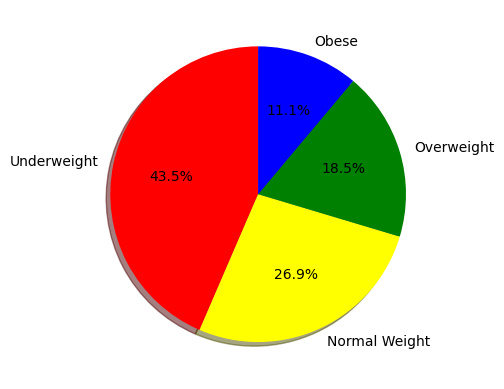

In [24]:
import matplotlib.pyplot as plt

labels = ['Underweight','Normal Weight','Overweight','Obese']
values = df['Label'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['red', 'yellow', 'green', 'blue']
ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=True,startangle=90,colors=colors)
plt.show()


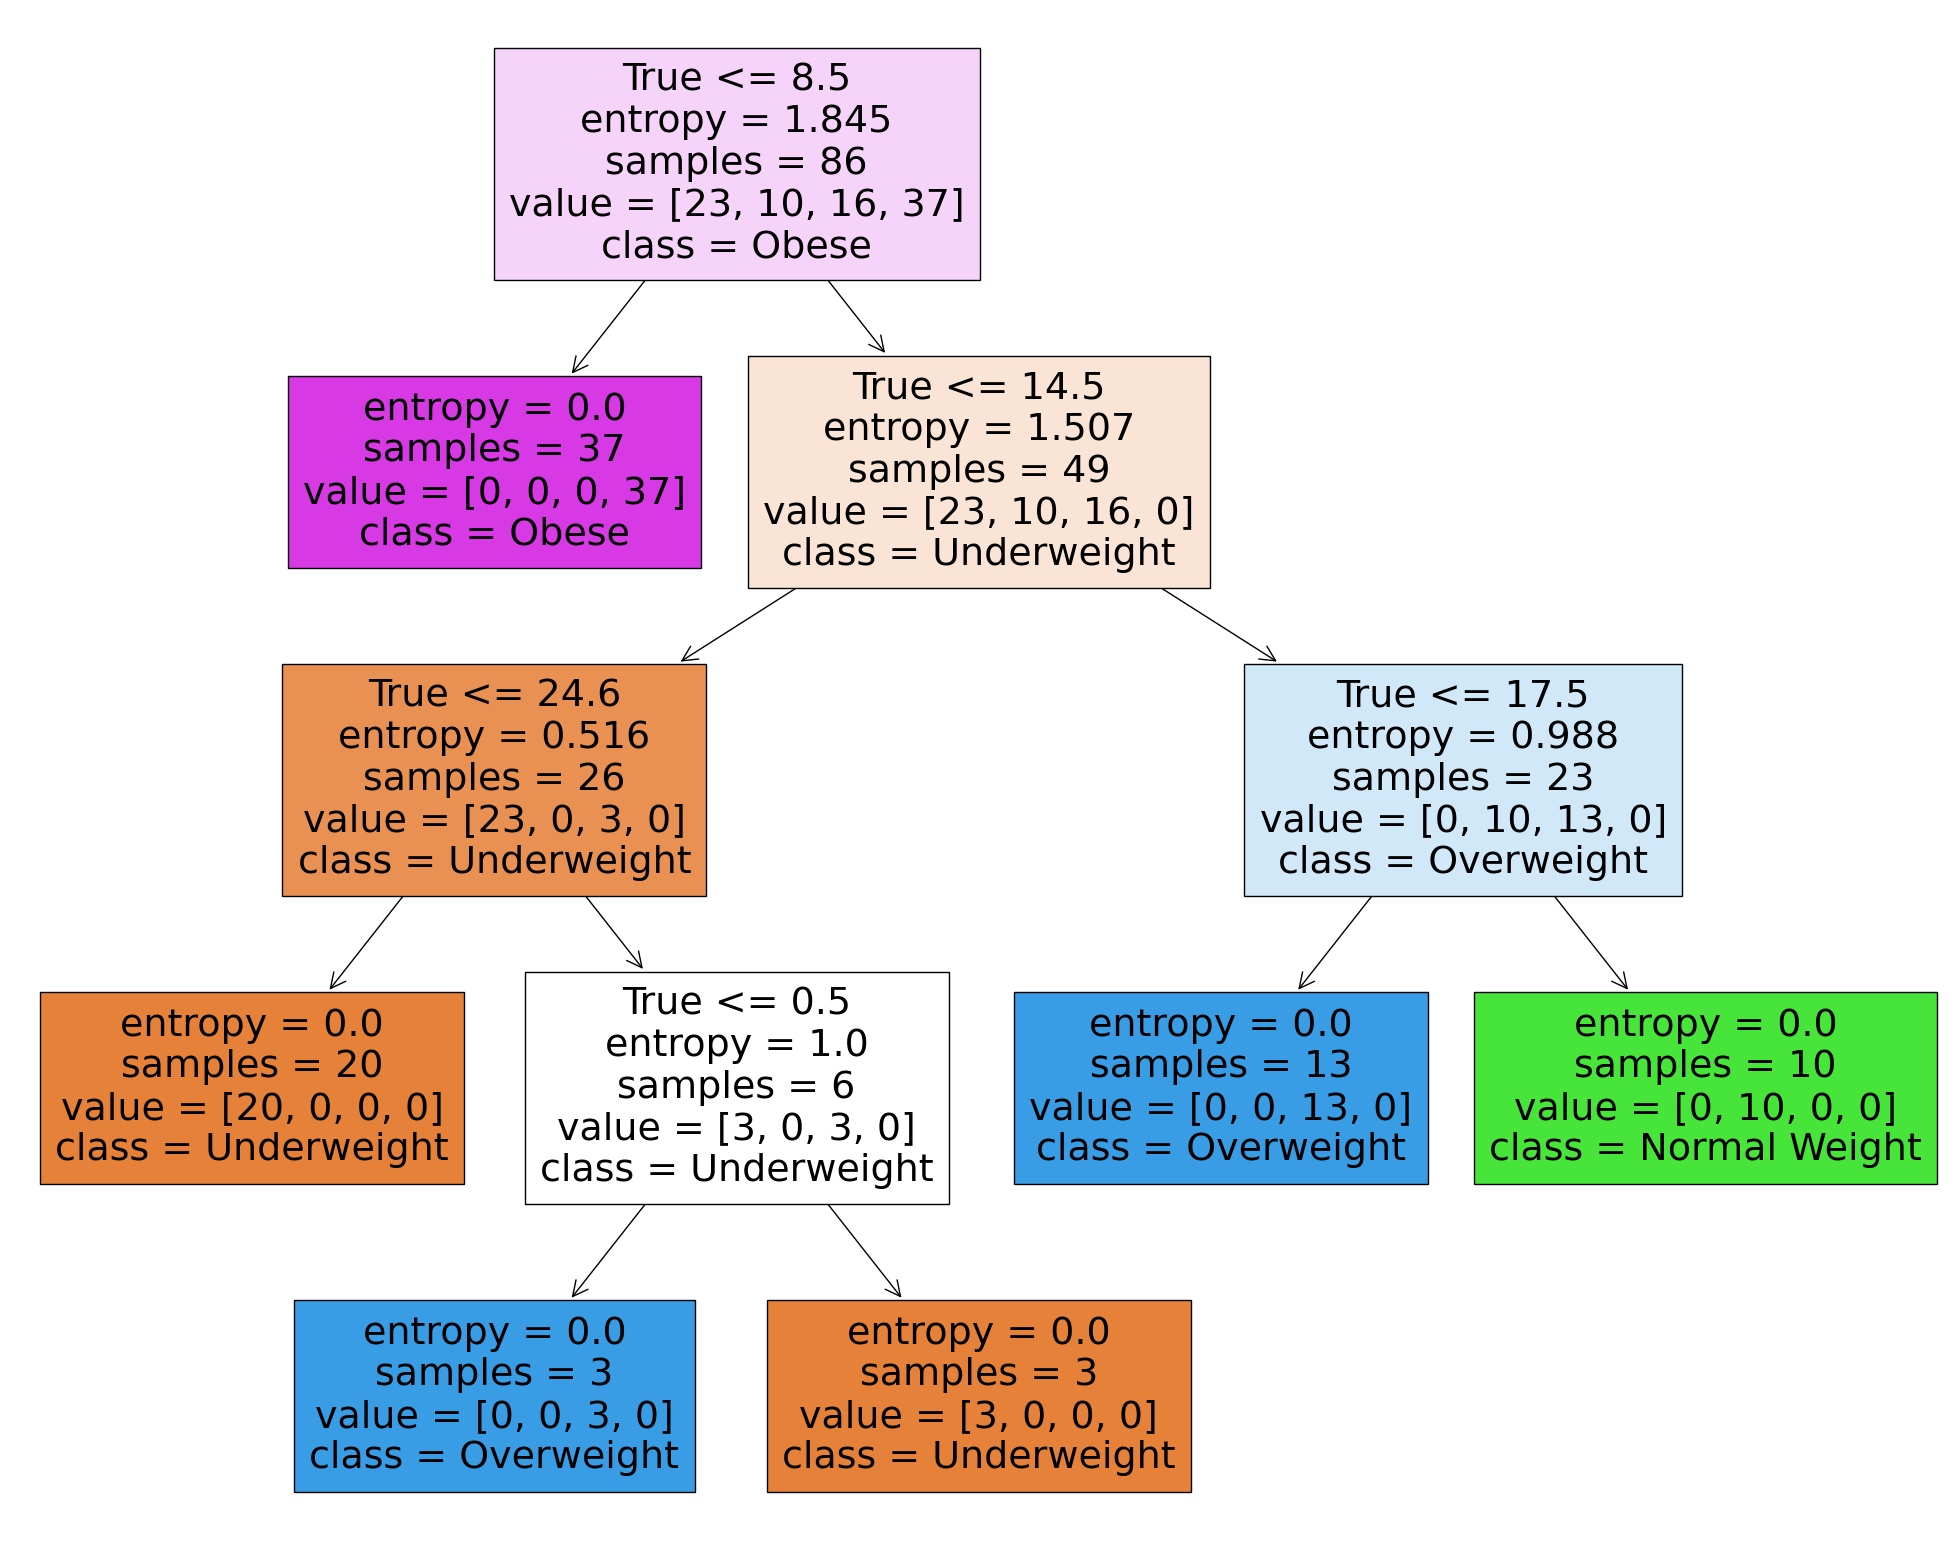

In [25]:
from sklearn import tree

fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(
        model,
        feature_names = ind_col,
        class_names = ['Underweight','Normal Weight','Overweight','Obese'],
        filled = True)

# Membuat Inputan Model 

In [26]:
input_data = (34, 1, 7, 18, 31.2)
input_data_numpy = np.asarray(input_data)
data_reshaped = input_data_numpy.reshape(1, -2)
prediksi = model.predict(data_reshaped)
print(prediksi)

if (prediksi[0] == 0):
    print('kategori berdat badan orang tersebut ialah Normal')
elif(prediksi == 1):
    print('kategori berdat badan orang tersebut ialah Obesitas')
elif(prediksi == 2):
    print('kategori berdat badan orang tersebut ialah berat')
else :
    print('kategori berdat badan orang tersebut ialah kurus')

[1]
kategori berdat badan orang tersebut ialah Obesitas


c:\Users\Dena Akbar\AppData\Local\Programs\Python\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Save Model

In [27]:
import pickle

filename = 'cl-obesitas.sav'
pickle.dump(model,open(filename,'wb'))